In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [4]:
from __future__ import division,print_function
import math, os, json, sys, re
import _pickle as pickle
from glob import glob
import numpy as np
from matplotlib import pyplot as plt
from operator import itemgetter, attrgetter, methodcaller
from collections import OrderedDict
import itertools
from itertools import chain
from shutil import copyfile

In [5]:
PATH = 'data/spiderscorpions/'
train_test_split = 0.2

In [49]:
n_spiders = !ls {PATH}spiders/train/ | wc -l
n_spiders = int(n_spiders[0])
n_scorpions = !ls {PATH}scorpions/train/ | wc -l
n_scorpions = int(n_scorpions[0])

In [54]:
0.2 * 599

119.80000000000001

In [53]:
0.2 * 691

138.20000000000002

In [28]:
math.floor(_)

138

In [33]:
%cd $PATH
%mkdir -p train/spiders
%mkdir -p train/scorpions
%mkdir -p test/spiders
%mkdir -p valid/spiders
%mkdir -p sample/spiders
%mkdir -p test/scorpions
%mkdir -p valid/scorpions
%mkdir -p sample/scorpions

/media/bmn/NEMO/DATA/AI/fastai/data/spiderscorpions


In [43]:
g = glob(f'{PATH}spiders/train/*.jpg')
for f in g:
    fname = f.split('/')[-1]
    os.rename(f, f'{PATH}train/spiders/'+fname)

-spider-and-insect-facts.jpg
00b3221da17f6e7aa8dcce96c39d0cf8--male-peacock-peacock-spider.jpg
01-creepy-spiders.ngsversion.1477830636886.adapt.1900.1.jpg
01-fossil-spider.jpg
01-new-spider-species.jpg
011117_SM_sea-spider_main.jpg
018e2ff92706db42051a704dd555c0c7--beaded-spiders-maker-space.jpg
02-jumping-spider.ngsversion.1502451851535.adapt.1900.1.jpg
02-new-spider-species.adapt.1900.1.jpg
05-new-spider-species.adapt.1900.1.jpg
05486beb5783f08321408d10f7a6928e--large-spiders-scary-spiders.jpg
05813599.jpg
nintchdbpict000263155914.jpg
nintchdbpict000263896475.jpg
nintchdbpict000271883224.jpg
nintchdbpict000282718614.jpg
nintchdbpict000282718617.jpg
nintchdbpict000282718618.jpg
nintchdbpict000282719302.jpg
nintchdbpict000312343185.jpg
nintchdbpict000340493265.jpg
nintchdbpict000347806916-1.jpg
northern-rivers-funnel-web.jpg
notebook_alive_32214.jpg
6910892-16x9-940x529.jpg
6968673_orig.jpg
6c6a39f9bffec95fbd4b9c735a3a5e20--the-spider-spider-webs.jpg
75e446acdbe397219865b14fd3a52f28--t

In [45]:
g = glob(f'{PATH}scorpions/train/*.jpg')
for f in g:
    fname = f.split('/')[-1]
    os.rename(f, f'{PATH}train/scorpions/'+fname)

In [8]:
ls {PATH}train/scorpions | wc -l

291


In [9]:
abs(291 - 478)

187

In [63]:
g = glob(f'{PATH}train/spiders/*.jpg')
shuf = np.random.permutation(g)
spider_test = 119
for i in range(spider_test):
    fname = shuf[i].split('/')[-1]
    os.rename(shuf[i], f'{PATH}test/spiders/' + fname)
for f in glob(f'{PATH}test/spiders/*.jpg'): 
    fname = f.split('/')[-1]
    copyfile(f, f'{PATH}valid/spiders/' + fname)

In [66]:
g = glob(f'{PATH}train/scorpions/*.jpg')
shuf = np.random.permutation(g)
spider_test = 119
for i in range(spider_test):
    fname = shuf[i].split('/')[-1]
    os.rename(shuf[i], f'{PATH}test/scorpions/' + fname)
for f in glob(f'{PATH}test/scorpions/*.jpg'): 
    fname = f.split('/')[-1]
    copyfile(f, f'{PATH}valid/scorpions/' + fname)

In [6]:
from fastai.imports import *
from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *

sz=224
arch=resnext50
bs=28

In [7]:
def get_data(sz, bs):
    tfms = tfms_from_model(arch, sz, aug_tfms=transforms_side_on, max_zoom=1.1)
    data = ImageClassifierData.from_paths(PATH, tfms=tfms, bs=bs, num_workers=4, test_name='test')
    return data if sz>300 else data.resize(340, 'tmp')

HBox(children=(IntProgress(value=0, max=6), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))


 95%|█████████▌| 20/21 [00:04<00:00,  4.97it/s, loss=2.69]

                                                          

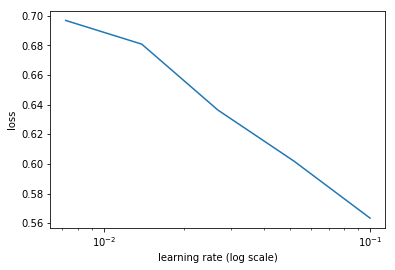

In [10]:
data = get_data(sz, bs)
learn = ConvLearner.pretrained(arch, data, ps=0.5)
learn.lr_find()
learn.sched.plot()

In [11]:
learn.precompute=False
learn.fit(0.01, 5, cycle_len=1)

HBox(children=(IntProgress(value=0, description='Epoch', max=5), HTML(value='')))


100%|██████████| 21/21 [00:04<00:00,  5.24it/s, loss=0.332]
                                                           [ 0.       0.33188  0.1483   0.93651]

100%|██████████| 21/21 [00:04<00:00,  5.20it/s, loss=0.246]
                                                           [ 1.       0.24643  0.14932  0.93254]

100%|██████████| 21/21 [00:05<00:00,  4.08it/s, loss=0.221]


                                                           [ 2.       0.22081  0.13707  0.94444]

100%|██████████| 21/21 [00:05<00:00,  3.52it/s, loss=0.183]
                                                           [ 3.       0.18284  0.20377  0.9246 ]

100%|██████████| 21/21 [00:04<00:00,  5.16it/s, loss=0.164]
                                                           [ 4.       0.16421  0.14858  0.94048]



In [14]:
learn.lr_find()

HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))


 86%|████████▌ | 18/21 [00:04<00:00,  3.88it/s, loss=0.216]

                                                           

Exception in thread Thread-10:
Traceback (most recent call last):
  File "/home/bmn/anaconda3/envs/fastai/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/bmn/anaconda3/envs/fastai/lib/python3.6/site-packages/tqdm/_tqdm.py", line 144, in run
    for instance in self.tqdm_cls._instances:
  File "/home/bmn/anaconda3/envs/fastai/lib/python3.6/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed size during iteration



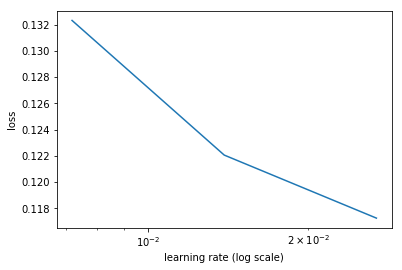

In [15]:
learn.sched.plot()

In [16]:
learn.fit(1e-2, 5, cycle_len=1, cycle_mult=2)

HBox(children=(IntProgress(value=0, description='Epoch', max=31), HTML(value='')))


100%|██████████| 21/21 [00:04<00:00,  5.24it/s, loss=0.102]
                                                           [ 0.       0.10218  0.1768   0.9246 ]

100%|██████████| 21/21 [00:04<00:00,  5.22it/s, loss=0.123]
                                                           [ 1.       0.12312  0.15783  0.94841]

100%|██████████| 21/21 [00:04<00:00,  5.15it/s, loss=0.106]


                                                           [ 2.       0.10649  0.15868  0.94444]

100%|██████████| 21/21 [00:04<00:00,  4.29it/s, loss=0.0962]
                                                            [ 3.       0.09617  0.13728  0.93831]

100%|██████████| 21/21 [00:04<00:00,  4.73it/s, loss=0.101]
                                                           [ 4.       0.10055  0.16971  0.94048]

 90%|█████████ | 19/21 [00:04<00:00,  3.86it/s, loss=0.103]


100%|██████████| 21/21 [00:05<00:00,  4.16it/s, loss=0.104]
                                                           [ 5.       0.10384  0.13755  0.95635]

100%|██████████| 21/21 [00:04<00:00,  4.36it/s, loss=0.106]
                                                           [ 6.       0.10584  0.16506  0.94444]

100%|██████████| 21/21 [00:04<00:00,  4.78it/s, loss=0.118]
                                                           [ 7.       0.11752  0.18074  0.94841]

 86%|████████▌ | 18/21 [00:04<00:00,  3.77it/s, loss=0.114]


100%|██████████| 21/21 [00:05<00:00,  3.95it/s, loss=0.112]
                                                           [ 8.       0.11158  0.15546  0.95635]

100%|██████████| 21/21 [00:04<00:00,  4.25it/s, loss=0.0988]
                                                            [ 9.       0.09883  0.20742  0.94841]

100%|██████████| 21/21 [00:04<00:00,  4.38it/s, loss=0.0838]
                                                            [ 10.        0.08378   0.18033   0.93651]

 81%|████████  | 17/21 [00:03<00:00,  4.65it/s, loss=0.0815]


100%|██████████| 21/21 [00:04<00:00,  4.86it/s, loss=0.0769]
                                                            [ 11.        0.07692   0.16617   0.93651]

100%|██████████| 21/21 [00:05<00:00,  4.12it/s, loss=0.0773]
                                                            [ 12.        0.07728   0.18561   0.93254]

100%|██████████| 21/21 [00:04<00:00,  4.84it/s, loss=0.0752]
                                                            [ 13.        0.0752    0.17977   0.93254]

 71%|███████▏  | 15/21 [00:03<00:01,  4.86it/s, loss=0.0715]


100%|██████████| 21/21 [00:04<00:00,  5.09it/s, loss=0.0681]
                                                            [ 14.        0.06812   0.16747   0.94048]

100%|██████████| 21/21 [00:05<00:00,  4.05it/s, loss=0.0651]
                                                            [ 15.        0.06507   0.21332   0.94444]

100%|██████████| 21/21 [00:04<00:00,  4.31it/s, loss=0.066]
                                                           [ 16.        0.06599   0.19459   0.94841]

 62%|██████▏   | 13/21 [00:03<00:02,  3.80it/s, loss=0.0774]


100%|██████████| 21/21 [00:04<00:00,  4.26it/s, loss=0.0746]
                                                            [ 17.        0.07461   0.16709   0.95635]

100%|██████████| 21/21 [00:05<00:00,  4.11it/s, loss=0.073]
                                                           [ 18.        0.07303   0.16379   0.95238]

100%|██████████| 21/21 [00:04<00:00,  4.56it/s, loss=0.0628]
                                                            [ 19.        0.06283   0.14542   0.96429]

 52%|█████▏    | 11/21 [00:03<00:03,  3.15it/s, loss=0.0575]


100%|██████████| 21/21 [00:05<00:00,  3.69it/s, loss=0.0589]
                                                            [ 20.        0.05894   0.19327   0.96032]

100%|██████████| 21/21 [00:05<00:00,  3.86it/s, loss=0.0585]
                                                            [ 21.        0.05845   0.15534   0.96429]

100%|██████████| 21/21 [00:05<00:00,  3.79it/s, loss=0.0491]
                                                            [ 22.        0.04915   0.17311   0.96032]

 43%|████▎     | 9/21 [00:02<00:03,  3.16it/s, loss=0.046]


100%|██████████| 21/21 [00:05<00:00,  3.83it/s, loss=0.0422]
                                                            [ 23.        0.04218   0.15002   0.96429]

100%|██████████| 21/21 [00:05<00:00,  4.09it/s, loss=0.0414]
                                                            [ 24.        0.0414    0.15888   0.96032]

100%|██████████| 21/21 [00:05<00:00,  4.14it/s, loss=0.0452]
                                                            [ 25.        0.04516   0.15033   0.95022]

 33%|███▎      | 7/21 [00:02<00:05,  2.74it/s, loss=0.045]


100%|██████████| 21/21 [00:05<00:00,  3.50it/s, loss=0.0469]
                                                            [ 26.        0.04693   0.15942   0.95635]

100%|██████████| 21/21 [00:04<00:00,  4.23it/s, loss=0.0531]
                                                            [ 27.        0.0531    0.17728   0.95635]

100%|██████████| 21/21 [00:05<00:00,  3.94it/s, loss=0.0527]
                                                            [ 28.        0.0527    0.15988   0.95635]

 24%|██▍       | 5/21 [00:01<00:06,  2.60it/s, loss=0.0554]


100%|██████████| 21/21 [00:05<00:00,  3.52it/s, loss=0.0572]
                                                            [ 29.        0.05723   0.15649   0.95635]

100%|██████████| 21/21 [00:07<00:00,  2.84it/s, loss=0.0568]
                                                            [ 30.        0.05685   0.14952   0.95635]



In [17]:
learn.save(f'spiderscorpion_{sz}_jan5')

In [8]:
learn.load(f'spiderscorpion_{sz}_jan5')

HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))


 24%|██▍       | 5/21 [00:01<00:04,  3.64it/s, loss=0.0241]

                                                           

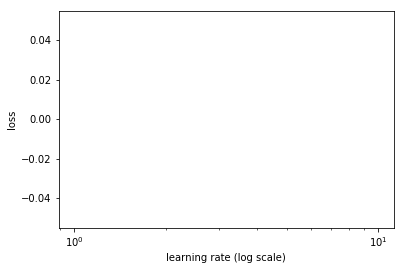

In [18]:
learn.lr_find()
learn.sched.plot()

In [13]:
learn.fit(0.001, 5, cycle_len=1, cycle_mult=2)

HBox(children=(IntProgress(value=0, description='Epoch', max=31), HTML(value='')))

[ 0.       0.03746  0.14467  0.95635]                       
[ 1.       0.04332  0.15054  0.95238]                       
[ 2.       0.04497  0.15796  0.95238]                       
[ 3.       0.04846  0.14608  0.95635]                       
[ 4.       0.06284  0.15839  0.95238]                       
[ 5.       0.05997  0.14355  0.95635]                       
[ 6.       0.04621  0.15574  0.94841]                       
[ 7.       0.04488  0.14486  0.96429]                       
[ 8.       0.04098  0.14706  0.95635]                       
[ 9.       0.04029  0.15684  0.95238]                       
[ 10.        0.04272   0.15516   0.95238]                   
[ 11.        0.04473   0.15425   0.95635]                   
[ 12.        0.04792   0.15244   0.95238]                   
[ 13.        0.03942   0.16278   0.95238]                   
[ 14.        0.04739   0.158     0.95238]                   
[ 15.        0.05045   0.16185   0.95238]                   
[ 16.        0.05042   0

In [14]:
learn.save(f'spiderscorpion_{sz}_jan4_95')

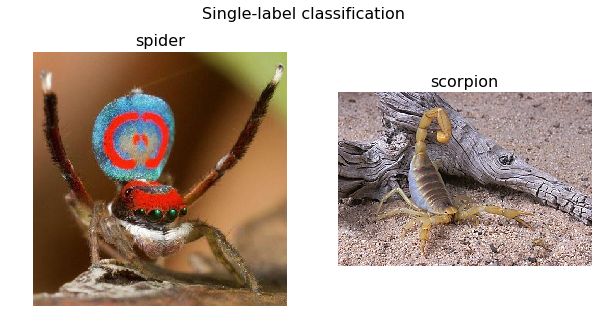

In [18]:
def get_1st(path): return glob(f'{path}/*.*')[0]
dc_path = f"{PATH}valid/"
list_paths = [get_1st(f"{dc_path}spiders"), get_1st(f"{dc_path}scorpions")]
plots_from_files(list_paths, titles=["spider", "scorpion"], maintitle="Single-label classification")

In [19]:
lr = 0.01
lrs = np.array([lr/9,lr/3,lr])

In [20]:
learn.unfreeze()
learn.fit(lrs, 5, cycle_len=1, cycle_mult=2)

HBox(children=(IntProgress(value=0, description='Epoch', max=31), HTML(value='')))


100%|██████████| 21/21 [00:11<00:00,  1.82it/s, loss=0.208]
                                                           [ 0.       0.20801  0.25411  0.93651]

100%|██████████| 21/21 [00:11<00:00,  1.81it/s, loss=0.216]
                                                           [ 1.       0.216    0.32343  0.89863]

100%|██████████| 21/21 [00:11<00:00,  1.76it/s, loss=0.163]


                                                           [ 2.       0.16331  0.26768  0.9145 ]

100%|██████████| 21/21 [00:11<00:00,  1.81it/s, loss=0.127]
                                                           [ 3.       0.12699  0.26593  0.9246 ]

100%|██████████| 21/21 [00:11<00:00,  1.77it/s, loss=0.108]
                                                           [ 4.       0.10783  0.3032   0.92857]

 95%|█████████▌| 20/21 [00:11<00:00,  1.77it/s, loss=0.103]


100%|██████████| 21/21 [00:11<00:00,  1.79it/s, loss=0.101]
                                                           [ 5.       0.10117  0.21962  0.94048]

100%|██████████| 21/21 [00:12<00:00,  1.64it/s, loss=0.0691]
                                                            [ 6.       0.06911  0.21635  0.93254]

100%|██████████| 21/21 [00:11<00:00,  1.76it/s, loss=0.0593]
                                                            [ 7.       0.05926  0.29611  0.90476]

 86%|████████▌ | 18/21 [00:10<00:01,  1.71it/s, loss=0.0516]


100%|██████████| 21/21 [00:12<00:00,  1.75it/s, loss=0.0512]
                                                            [ 8.       0.0512   0.30893  0.9145 ]

100%|██████████| 21/21 [00:11<00:00,  1.76it/s, loss=0.0502]
                                                            [ 9.       0.05016  0.22841  0.93434]

100%|██████████| 21/21 [00:12<00:00,  1.69it/s, loss=0.0423]
                                                            [ 10.        0.04229   0.17452   0.94048]

 76%|███████▌  | 16/21 [00:10<00:03,  1.54it/s, loss=0.0382]


100%|██████████| 21/21 [00:12<00:00,  1.62it/s, loss=0.0496]
                                                            [ 11.        0.04965   0.1739    0.93037]

100%|██████████| 21/21 [00:12<00:00,  1.67it/s, loss=0.0352]
                                                            [ 12.        0.03516   0.17619   0.93037]

100%|██████████| 21/21 [00:13<00:00,  1.56it/s, loss=0.0243]
                                                            [ 13.        0.02429   0.17285   0.93037]

 67%|██████▋   | 14/21 [00:08<00:04,  1.56it/s, loss=0.0213]


100%|██████████| 21/21 [00:12<00:00,  1.63it/s, loss=0.0187]
                                                            [ 14.        0.0187    0.17629   0.93037]

100%|██████████| 21/21 [00:13<00:00,  1.52it/s, loss=0.0129]
                                                            [ 15.        0.01286   0.16389   0.93434]

100%|██████████| 21/21 [00:12<00:00,  1.63it/s, loss=0.0108]
                                                            [ 16.        0.0108    0.16816   0.93831]

 57%|█████▋    | 12/21 [00:07<00:05,  1.53it/s, loss=0.00944]


100%|██████████| 21/21 [00:12<00:00,  1.63it/s, loss=0.00816]
                                                             [ 17.        0.00816   0.17381   0.93651]

100%|██████████| 21/21 [00:12<00:00,  1.63it/s, loss=0.00795]
                                                             [ 18.        0.00795   0.21539   0.92063]

100%|██████████| 21/21 [00:14<00:00,  1.50it/s, loss=0.00619]
                                                             [ 19.        0.00619   0.19847   0.92641]

 43%|████▎     | 9/21 [00:07<00:10,  1.15it/s, loss=0.00546]


100%|██████████| 21/21 [00:14<00:00,  1.40it/s, loss=0.00651]
                                                             [ 20.        0.00651   0.19977   0.93037]

100%|██████████| 21/21 [00:13<00:00,  1.51it/s, loss=0.00534]
                                                             [ 21.        0.00534   0.23725   0.93254]

100%|██████████| 21/21 [00:14<00:00,  1.47it/s, loss=0.00623]
                                                             [ 22.        0.00623   0.2141    0.94444]

 29%|██▊       | 6/21 [00:04<00:11,  1.25it/s, loss=0.00556]


100%|██████████| 21/21 [00:13<00:00,  1.53it/s, loss=0.00489]
                                                             [ 23.        0.00489   0.22121   0.92857]

100%|██████████| 21/21 [00:14<00:00,  1.48it/s, loss=0.00478]
                                                             [ 24.        0.00478   0.22343   0.92857]

100%|██████████| 21/21 [00:13<00:00,  1.52it/s, loss=0.00386]
                                                             [ 25.        0.00386   0.22306   0.93254]

 14%|█▍        | 3/21 [00:03<00:22,  1.25s/it, loss=0.00518]


100%|██████████| 21/21 [00:16<00:00,  1.29it/s, loss=0.00487]
                                                             [ 26.        0.00487   0.28161   0.90873]

100%|██████████| 21/21 [00:13<00:00,  1.52it/s, loss=0.0167]
                                                            [ 27.        0.01666   0.22652   0.92641]

100%|██████████| 21/21 [00:14<00:00,  1.42it/s, loss=0.0137]
                                                            [ 28.        0.0137    0.2523    0.92063]

  0%|          | 0/21 [00:01<?, ?it/s, loss=0.0135]


100%|██████████| 21/21 [00:14<00:00,  1.43it/s, loss=0.0126]
                                                            [ 29.        0.01257   0.23433   0.9246 ]

100%|██████████| 21/21 [00:16<00:00,  1.26it/s, loss=0.00949]
                                                             [ 30.        0.00949   0.22235   0.91847]



In [17]:
data = get_data(256, bs)

HBox(children=(IntProgress(value=0, max=6), HTML(value='')))

In [18]:
learn.set_data(data)
learn.freeze()
learn.lr_find()

HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))

 10%|▉         | 2/21 [00:01<00:15,  1.26it/s, loss=0.00183] 


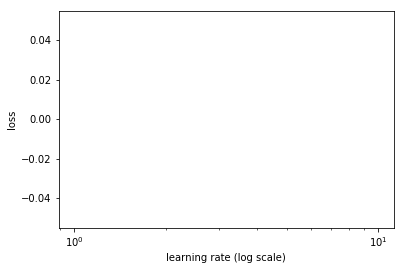

In [19]:
learn.sched.plot()

In [9]:
size_d = {k: PIL.Image.open(PATH+k).size for k in data.trn_ds.fnames}
row_sz, col_sz = list(zip(*size_d.values()))
row_sz = np.array(row_sz); col_sz = np.array(col_sz)

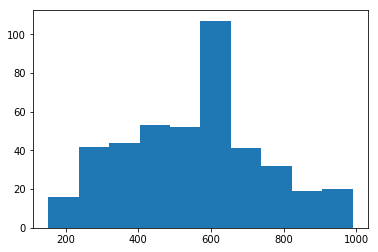

In [10]:
plt.hist(row_sz[row_sz<1000]);

In [21]:
learn.unfreeze()
learn.bn_freeze(True)
%time learn.fit(lrs, 1, cycle_len=1)

HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))


100%|██████████| 21/21 [00:11<00:00,  1.83it/s, loss=0.000195]
                                                              [ 0.       0.00019  0.22261  0.92244]

CPU times: user 18.7 s, sys: 1.12 s, total: 19.8 s
Wall time: 13.1 s


In [22]:
learn.fit(0.01, 6, cycle_len=1, cycle_mult=2)

HBox(children=(IntProgress(value=0, description='Epoch', max=63), HTML(value='')))


100%|██████████| 21/21 [00:11<00:00,  1.82it/s, loss=0.000125]
                                                              [ 0.       0.00013  0.22847  0.92244]

100%|██████████| 21/21 [00:11<00:00,  1.80it/s, loss=0.000103]
                                                              [ 1.       0.0001   0.26266  0.92063]

 86%|████████▌ | 18/21 [00:10<00:01,  1.77it/s, loss=8.57e-05]


100%|██████████| 21/21 [00:11<00:00,  1.79it/s, loss=0.000129]
                                                              [ 2.       0.00013  0.25797  0.9246 ]

100%|██████████| 21/21 [00:11<00:00,  1.79it/s, loss=0.000128]
                                                              [ 3.       0.00013  0.23426  0.94048]

100%|██████████| 21/21 [00:11<00:00,  1.82it/s, loss=0.00012]
                                                             [ 4.       0.00012  0.24002  0.93651]

 67%|██████▋   | 14/21 [00:08<00:04,  1.69it/s, loss=0.000123]


100%|██████████| 21/21 [00:11<00:00,  1.76it/s, loss=0.000116]
                                                              [ 5.       0.00012  0.24447  0.9246 ]

100%|██████████| 21/21 [00:12<00:00,  1.70it/s, loss=0.000919]
                                                              [ 6.       0.00092  0.40365  0.90079]

100%|██████████| 21/21 [00:11<00:00,  1.88it/s, loss=7.6e+25]
                                                             [  7.00000e+00   7.59722e+25   1.26192e+25   4.64286e-01]

 48%|████▊     | 10/21 [00:05<00:06,  1.77it/s, loss=1.61e+26]


100%|██████████| 21/21 [00:11<00:00,  1.88it/s, loss=2.55e+26]
                                                              [  8.00000e+00   2.55204e+26   1.32354e+26   4.64286e-01]

100%|██████████| 21/21 [00:11<00:00,  1.88it/s, loss=3.45e+26]
                                                              [  9.00000e+00   3.44753e+26   8.47891e+25   5.35714e-01]

100%|██████████| 21/21 [00:11<00:00,  1.84it/s, loss=3.94e+26]
                                                              [  1.00000e+01   3.93525e+26   1.97620e+26   4.64286e-01]

 24%|██▍       | 5/21 [00:03<00:11,  1.43it/s, loss=3.89e+26]


100%|██████████| 21/21 [00:11<00:00,  1.89it/s, loss=3.87e+26]
                                                              [  1.10000e+01   3.86516e+26   2.16985e+26   4.64286e-01]

100%|██████████| 21/21 [00:11<00:00,  1.80it/s, loss=3.43e+26]
                                                              [  1.20000e+01   3.43205e+26   1.16891e+26   5.35714e-01]

100%|██████████| 21/21 [00:11<00:00,  1.77it/s, loss=2.75e+26]
                                                              [  1.30000e+01   2.75402e+26   9.62214e+25   5.35714e-01]

  5%|▍         | 1/21 [00:01<00:23,  1.15s/it, loss=2.73e+26]


100%|██████████| 21/21 [00:11<00:00,  1.78it/s, loss=2.26e+26]
                                                              [  1.40000e+01   2.26048e+26   4.14305e+25   4.64286e-01]

100%|██████████| 21/21 [00:11<00:00,  1.77it/s, loss=4.44e+26]
                                                              [  1.50000e+01   4.43518e+26   3.19658e+26   5.35714e-01]

 90%|█████████ | 19/21 [00:10<00:01,  1.74it/s, loss=5.09e+26]


100%|██████████| 21/21 [00:11<00:00,  1.77it/s, loss=5.22e+26]
                                                              [  1.60000e+01   5.22000e+26   4.33693e+26   5.35714e-01]

100%|██████████| 21/21 [00:11<00:00,  1.76it/s, loss=5.33e+26]
                                                              [  1.70000e+01   5.32887e+26   5.95340e+26   5.35714e-01]

100%|██████████| 21/21 [00:12<00:00,  1.74it/s, loss=5.49e+26]
                                                              [  1.80000e+01   5.48608e+26   2.13877e+26   5.35714e-01]

 67%|██████▋   | 14/21 [00:09<00:04,  1.55it/s, loss=5.4e+26] 


100%|██████████| 21/21 [00:12<00:00,  1.73it/s, loss=5.66e+26]
                                                              [  1.90000e+01   5.65988e+26   3.49748e+26   4.64286e-01]

100%|██████████| 21/21 [00:12<00:00,  1.64it/s, loss=5.52e+26]
                                                              [  2.00000e+01   5.51708e+26   2.81502e+26   5.35714e-01]

100%|██████████| 21/21 [00:12<00:00,  1.69it/s, loss=5.62e+26]
                                                              [  2.10000e+01   5.62215e+26   3.81491e+26   4.64286e-01]

 48%|████▊     | 10/21 [00:06<00:06,  1.60it/s, loss=5.3e+26]


100%|██████████| 21/21 [00:11<00:00,  1.75it/s, loss=5.04e+26]
                                                              [  2.20000e+01   5.03780e+26   4.55726e+26   4.64286e-01]

100%|██████████| 21/21 [00:11<00:00,  1.77it/s, loss=4.55e+26]
                                                              [  2.30000e+01   4.55230e+26   3.79688e+26   4.64286e-01]

100%|██████████| 21/21 [00:11<00:00,  1.78it/s, loss=4.14e+26]
                                                              [  2.40000e+01   4.14285e+26   1.55795e+26   5.35714e-01]

 29%|██▊       | 6/21 [00:03<00:09,  1.54it/s, loss=3.89e+26]


100%|██████████| 21/21 [00:11<00:00,  1.78it/s, loss=3.44e+26]
                                                              [  2.50000e+01   3.43696e+26   4.68144e+25   5.35714e-01]

100%|██████████| 21/21 [00:11<00:00,  1.78it/s, loss=2.85e+26]
                                                              [  2.60000e+01   2.84655e+26   1.45623e+26   4.64286e-01]

100%|██████████| 21/21 [00:11<00:00,  1.77it/s, loss=2.51e+26]
                                                              [  2.70000e+01   2.50629e+26   8.41659e+24   4.64286e-01]

  5%|▍         | 1/21 [00:01<00:34,  1.75s/it, loss=2.45e+26]


100%|██████████| 21/21 [00:12<00:00,  1.75it/s, loss=2.01e+26]
                                                              [  2.80000e+01   2.01410e+26   4.86644e+24   4.64286e-01]

100%|██████████| 21/21 [00:11<00:00,  1.78it/s, loss=1.69e+26]
                                                              [  2.90000e+01   1.69216e+26   1.82573e+25   4.64286e-01]

 90%|█████████ | 19/21 [00:11<00:01,  1.61it/s, loss=1.43e+26]


100%|██████████| 21/21 [00:12<00:00,  1.72it/s, loss=1.43e+26]
                                                              [  3.00000e+01   1.42639e+26   9.64831e+24   4.64286e-01]

100%|██████████| 21/21 [00:12<00:00,  1.73it/s, loss=4.67e+26]
                                                              [  3.10000e+01   4.66529e+26   1.78976e+27   4.64286e-01]

100%|██████████| 21/21 [00:12<00:00,  1.72it/s, loss=5.94e+26]
                                                              [  3.20000e+01   5.94351e+26   3.50018e+26   4.64286e-01]

 71%|███████▏  | 15/21 [00:09<00:03,  1.59it/s, loss=6.1e+26] 


100%|██████████| 21/21 [00:12<00:00,  1.75it/s, loss=5.93e+26]
                                                              [  3.30000e+01   5.92937e+26   4.66545e+26   4.64286e-01]

100%|██████████| 21/21 [00:12<00:00,  1.75it/s, loss=5.56e+26]
                                                              [  3.40000e+01   5.56403e+26   3.52454e+26   5.35714e-01]

100%|██████████| 21/21 [00:11<00:00,  1.76it/s, loss=5.32e+26]
                                                              [  3.50000e+01   5.32115e+26   3.31299e+26   5.35714e-01]

 52%|█████▏    | 11/21 [00:06<00:06,  1.63it/s, loss=5.74e+26]


100%|██████████| 21/21 [00:11<00:00,  1.75it/s, loss=6.17e+26]
                                                              [  3.60000e+01   6.16896e+26   6.89350e+26   5.35714e-01]

100%|██████████| 21/21 [00:12<00:00,  1.74it/s, loss=5.86e+26]
                                                              [  3.70000e+01   5.86223e+26   3.80164e+26   5.35714e-01]

100%|██████████| 21/21 [00:11<00:00,  1.76it/s, loss=5.17e+26]
                                                              [  3.80000e+01   5.16922e+26   9.71539e+25   5.35714e-01]

 29%|██▊       | 6/21 [00:04<00:11,  1.31it/s, loss=5.16e+26]


100%|██████████| 21/21 [00:11<00:00,  1.75it/s, loss=4.74e+26]
                                                              [  3.90000e+01   4.74326e+26   4.67111e+26   5.35714e-01]

100%|██████████| 21/21 [00:12<00:00,  1.70it/s, loss=4.58e+26]
                                                              [  4.00000e+01   4.58110e+26   4.46926e+26   4.64286e-01]

100%|██████████| 21/21 [00:13<00:00,  1.59it/s, loss=3.96e+26]
                                                              [  4.10000e+01   3.95571e+26   6.60944e+25   5.35714e-01]

 10%|▉         | 2/21 [00:01<00:18,  1.02it/s, loss=3.91e+26]


100%|██████████| 21/21 [00:12<00:00,  1.66it/s, loss=3.89e+26]
                                                              [  4.20000e+01   3.89064e+26   5.63953e+26   5.35714e-01]

100%|██████████| 21/21 [00:12<00:00,  1.66it/s, loss=4.04e+26]
                                                              [  4.30000e+01   4.03848e+26   2.34280e+25   5.35714e-01]

 95%|█████████▌| 20/21 [00:12<00:00,  1.64it/s, loss=3.62e+26]


100%|██████████| 21/21 [00:12<00:00,  1.66it/s, loss=3.6e+26]
                                                             [  4.40000e+01   3.60295e+26   3.71788e+26   4.64286e-01]

100%|██████████| 21/21 [00:12<00:00,  1.70it/s, loss=3.92e+26]
                                                              [  4.50000e+01   3.91871e+26   1.34160e+26   4.64286e-01]

100%|██████████| 21/21 [00:12<00:00,  1.69it/s, loss=3.57e+26]
                                                              [  4.60000e+01   3.56582e+26   2.74838e+26   5.35714e-01]

 76%|███████▌  | 16/21 [00:10<00:03,  1.58it/s, loss=3.48e+26]


100%|██████████| 21/21 [00:12<00:00,  1.64it/s, loss=3.38e+26]
                                                              [  4.70000e+01   3.37763e+26   2.17495e+26   4.64286e-01]

100%|██████████| 21/21 [00:12<00:00,  1.64it/s, loss=3.4e+26]
                                                             [  4.80000e+01   3.40454e+26   2.92091e+25   4.64286e-01]

100%|██████████| 21/21 [00:12<00:00,  1.65it/s, loss=2.93e+26]
                                                              [  4.90000e+01   2.93441e+26   6.89248e+25   5.35714e-01]

 52%|█████▏    | 11/21 [00:09<00:08,  1.15it/s, loss=2.6e+26] 


100%|██████████| 21/21 [00:15<00:00,  1.39it/s, loss=2.41e+26]
                                                              [  5.00000e+01   2.40893e+26   1.26234e+26   4.64286e-01]

100%|██████████| 21/21 [00:15<00:00,  1.33it/s, loss=1.98e+26]
                                                              [  5.10000e+01   1.97518e+26   1.31039e+26   5.35714e-01]

100%|██████████| 21/21 [00:14<00:00,  1.45it/s, loss=1.68e+26]
                                                              [  5.20000e+01   1.68333e+26   1.28111e+26   5.35714e-01]

 33%|███▎      | 7/21 [00:05<00:11,  1.26it/s, loss=1.66e+26]


100%|██████████| 21/21 [00:13<00:00,  1.55it/s, loss=1.6e+26]
                                                             [  5.30000e+01   1.59638e+26   8.46147e+25   5.35714e-01]

100%|██████████| 21/21 [00:14<00:00,  1.44it/s, loss=1.33e+26]
                                                              [  5.40000e+01   1.33049e+26   3.84150e+25   5.35714e-01]

100%|██████████| 21/21 [00:13<00:00,  1.55it/s, loss=1.14e+26]
                                                              [  5.50000e+01   1.13939e+26   2.82869e+25   5.35714e-01]

 10%|▉         | 2/21 [00:02<00:25,  1.32s/it, loss=1.12e+26]


100%|██████████| 21/21 [00:12<00:00,  1.63it/s, loss=9.62e+25]
                                                              [  5.60000e+01   9.61533e+25   6.78989e+25   4.64286e-01]

100%|██████████| 21/21 [00:13<00:00,  1.55it/s, loss=8.79e+25]
                                                              [  5.70000e+01   8.78957e+25   4.72535e+25   5.35714e-01]

 95%|█████████▌| 20/21 [00:15<00:00,  1.30it/s, loss=7.79e+25]


100%|██████████| 21/21 [00:15<00:00,  1.36it/s, loss=7.79e+25]
                                                              [  5.80000e+01   7.79061e+25   2.79596e+25   5.35714e-01]

100%|██████████| 21/21 [00:12<00:00,  1.66it/s, loss=6.61e+25]
                                                              [  5.90000e+01   6.60672e+25   8.49072e+24   5.35714e-01]

100%|██████████| 21/21 [00:12<00:00,  1.66it/s, loss=5.65e+25]
                                                              [  6.00000e+01   5.65300e+25   3.97509e+24   5.35714e-01]

 76%|███████▌  | 16/21 [00:10<00:03,  1.58it/s, loss=5.11e+25]


100%|██████████| 21/21 [00:12<00:00,  1.64it/s, loss=5e+25]
                                                           [  6.10000e+01   5.00313e+25   6.04476e+24   4.64286e-01]

100%|██████████| 21/21 [00:13<00:00,  1.56it/s, loss=4.69e+25]
                                                              [  6.20000e+01   4.69458e+25   1.67816e+23   5.35714e-01]



In [12]:
log_preds,y = learn.TTA()
preds = np.mean(np.exp(log_preds),0)

In [13]:
accuracy(preds, y)

0.93617021276595747

In [14]:
data.classes

['scorpions', 'spiders']

In [16]:
preds = np.argmax(log_preds, axis=1)  # from log probabilities to 0 or 1
probs = np.exp(log_preds[:,1])        # pr(dog)

In [17]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y, preds)

ValueError: Found input variables with inconsistent numbers of samples: [235, 5]

In [41]:
tfms = tfms_from_model(resnext50, sz, aug_tfms=transforms_side_on, max_zoom=1.2)
def get_augs(i):
    bs = 4
    assert i <= bs
    data = ImageClassifierData.from_paths(PATH, bs=bs, tfms=tfms, num_workers=1)
    x, _ = next(iter(data.aug_dl))
    return data.trn_ds.denorm(x)[i]

In [44]:
ims = np.stack([get_augs(2) for i in range(10)])

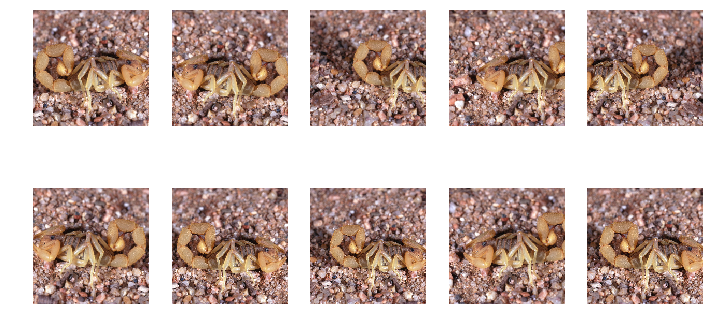

In [45]:
plots(ims, rows=2)

In [15]:
def rand_by_mask(mask): return np.random.choice(np.where(mask)[0], 4, replace=False)
def rand_by_correct(is_correct): return rand_by_mask((preds == data.val_y)==is_correct)

def plot_val_with_title(idxs, title):
    imgs = np.stack([data.val_ds[x][0] for x in idxs])
    title_probs = [probs[x] for x in idxs]
    print(title)
    return plots(data.val_ds.denorm(imgs), rows=1, titles=title_probs)

def plots(ims, figsize=(12,6), rows=1, titles=None):
    f = plt.figure(figsize=figsize)
    for i in range(len(ims)):
        sp = f.add_subplot(rows, len(ims)//rows, i+1)
        sp.axis('Off')
        if titles is not None: sp.set_title(titles[i], fontsize=16)
        plt.imshow(ims[i])

def load_img_id(ds, idx): return np.array(PIL.Image.open(PATH+ds.fnames[idx]))

def plot_val_with_title(idxs, title):
    imgs = [load_img_id(data.val_ds,x) for x in idxs]
    title_probs = [probs[x] for x in idxs]
    print(title)
    return plots(imgs, rows=1, titles=title_probs, figsize=(16,8))

def most_by_mask(mask, mult):
    idxs = np.where(mask)[0]
    return idxs[np.argsort(mult * probs[idxs])[:4]]

def most_by_correct(y, is_correct): 
    mult = -1 if (y==1)==is_correct else 1
    return most_by_mask((preds == data.val_y)==is_correct & (data.val_y == y), mult)

In [16]:
plot_val_with_title(most_by_correct(0, True), "Most correct scorpions")

/home/bmn/anaconda3/envs/fastai/lib/python3.6/site-packages/ipykernel_launcher.py:32: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.


IndexError: index 117 is out of bounds for axis 0 with size 5

In [17]:
plot_val_with_title(most_by_correct(1, True), "Most correct spiders")

/home/bmn/anaconda3/envs/fastai/lib/python3.6/site-packages/ipykernel_launcher.py:32: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.


IndexError: index 5 is out of bounds for axis 0 with size 5

In [18]:
plot_val_with_title(most_by_correct(1, False), "Most incorrect spiders")

/home/bmn/anaconda3/envs/fastai/lib/python3.6/site-packages/ipykernel_launcher.py:32: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.


IndexError: index 5 is out of bounds for axis 0 with size 5

In [19]:
plot_val_with_title(most_by_correct(0, False), "Most incorrect scorpions")

/home/bmn/anaconda3/envs/fastai/lib/python3.6/site-packages/ipykernel_launcher.py:32: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.


IndexError: index 5 is out of bounds for axis 0 with size 5